In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
plt.style.use('ggplot')

In [91]:
actions = pd.read_csv('actions-1.csv')
cases = pd.read_csv('cases-deaths.csv', index_col=False)

In [92]:
cases.head()

,Location,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
0,United States,184206,561.193845,3647,11.110789
1,Alabama,949,193.547663,15,3.059236
2,Alaska,119,162.669419,3,4.100910
3,Arizona,"1,289",177.091650,24,3.297284
4,Arkansas,508,168.334325,8,2.650934


In [93]:
cases.drop(index=[0], inplace=True)
cases.set_index('Location', inplace=True)

In [94]:
cases['Number of COVID-19 Cases'].dtype

dtype('O')

In [95]:
cases.head()

,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
Location,,,,
Alabama,949,193.547663,15,3.059236
Alaska,119,162.669419,3,4.100910
Arizona,"1,289",177.091650,24,3.297284
Arkansas,508,168.334325,8,2.650934
California,"7,540",190.827026,153,3.872219


In [96]:
actions.head()

,Location,Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Primary Election Postponement,Emergency Declaration,Footnotes
0,United States,Statewide (28); Affected Counties (2); High-ri...,All Travelers (9); All Air Travelers (1); From...,All Non-Essential Businesses (29); All Non-Ess...,All Gatherings Prohibited (16); >10 Prohibited...,Yes (46); Effectively Closed (2); Other (1); N...,Closed except for takeout/delivery (44); Limit...,Yes (12); No (39),Yes (51); No (0),NaN
1,Alabama,-,-,Other,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,Yes,1.0
2,Alaska,Statewide,All Travelers,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,-,Yes,NaN
3,Arizona,Statewide,-,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,-,Yes,NaN
4,Arkansas,-,-,-,>10 People Prohibited,Yes,Closed except for takeout/delivery,-,Yes,NaN


In [97]:
actions.set_index('Location', inplace=True)
actions.drop(labels=['United States'], axis=0, inplace=True)
actions.drop(labels=["Primary Election Postponement", "Footnotes"], axis=1, inplace=True)

In [98]:
actions.head()

,Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Emergency Declaration
Location,,,,,,,
Alabama,-,-,Other,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
Alaska,Statewide,All Travelers,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes
Arizona,Statewide,-,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
Arkansas,-,-,-,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes
California,Statewide,-,All Non-Essential Businesses,All Gatherings Prohibited,Effectively Closed,Closed except for takeout/delivery,Yes


In [99]:
combined_data = pd.merge(actions, cases, on="Location", how="outer")

combined_data.dropna( inplace=True)

In [100]:
combined_data.drop(index="District of Columbia", inplace=True)
combined_data.head()

,Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Emergency Declaration,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
Location,,,,,,,,,,,
Alabama,-,-,Other,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,949,193.547663,15,3.059236
Alaska,Statewide,All Travelers,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes,119,162.669419,3,4.100910
Arizona,Statewide,-,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,"1,289",177.091650,24,3.297284
Arkansas,-,-,-,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,508,168.334325,8,2.650934
California,Statewide,-,All Non-Essential Businesses,All Gatherings Prohibited,Effectively Closed,Closed except for takeout/delivery,Yes,"7,540",190.827026,153,3.872219


In [101]:
len(combined_data)

50

In [102]:
combined_data['Deaths from COVID-19'].min()

0

In [103]:
options = [0,1,2,3]

In [72]:
combined_data.loc[combined_data['Deaths from COVID-19'].isin(options)]

,Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Emergency Declaration,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
Location,,,,,,,,,,,
Alaska,Statewide,All Travelers,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes,119,162.669419,3,4.100910
Hawaii,Statewide,All Travelers,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,204,144.080821,0,0.000000
Nebraska,-,-,-,Other,Other,Limited On-site Service,Yes,153,79.093966,3,1.550862
New Hampshire,Statewide,-,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,314,230.931426,3,2.206351
North Dakota,-,-,-,-,Yes,Closed except for takeout/delivery,Yes,122,160.091961,3,3.936688
South Dakota,-,-,-,>10 People Prohibited,Yes,-,Yes,108,122.080937,1,1.130379
West Virginia,Statewide,From Certain States,All Non-Essential Businesses,All Gatherings Prohibited,Yes,Closed except for takeout/delivery,Yes,145,80.908542,1,0.557990
Wyoming,-,-,-,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,109,188.334004,0,0.000000


In [73]:
combined_data['COVID-19 Deaths per 1,000,000 Population'].min()

0.0

In [74]:
combined_data.loc[combined_data['COVID-19 Deaths per 1,000,000 Population'].isin(options)]

,Stay At Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,State-Mandated School Closures,Bar/Restaurant Limits,Emergency Declaration,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population"
Location,,,,,,,,,,,
Hawaii,Statewide,All Travelers,All Non-Essential Businesses,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,204,144.080821,0,0.0
Wyoming,-,-,-,>10 People Prohibited,Yes,Closed except for takeout/delivery,Yes,109,188.334004,0,0.0


                                      Analysis
                                      
It is visible that states that have taken all actions or nearly all actions have significantly lower number of case or death counts than the states that have taken some or only a few actions. Still, this claim cannot be justified that enacting all the action will mitigate the rate of cases/deaths on the ground that some states haven't implimented all the actions yet they have lowes death rates possible. It is hard to prove such causations bases on this dataset and more advanced and in-depth reaserach is required to learn which measure has been more effective than others throughout the preventative process.

In [39]:
threshold = combined_data.describe()["Deaths from COVID-19"]["50%"]
threshold

15.0

In [40]:
combined_data = pd.get_dummies(combined_data)

In [41]:
combined_data["Deaths from COVID-19"] = combined_data["Deaths from COVID-19"]\
.apply(lambda deaths: 1 if deaths >= threshold else 0)

columns = ["Number of COVID-19 Cases", "COVID-19 Cases per 1,000,000 Population", "COVID-19 Deaths per 1,000,000 Population"]

combined_data.head()

,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",Stay At Home Order_-,Stay At Home Order_Affected Counties,Stay At Home Order_High-risk Groups,Stay At Home Order_Statewide,Mandatory Quarantine for Travelers_-,Mandatory Quarantine for Travelers_All Air Travelers,Mandatory Quarantine for Travelers_All Travelers,...,"Number of COVID-19 Cases_6,620",Number of COVID-19 Cases_612,Number of COVID-19 Cases_629,"Number of COVID-19 Cases_7,540","Number of COVID-19 Cases_7,615","Number of COVID-19 Cases_75,795",Number of COVID-19 Cases_878,Number of COVID-19 Cases_925,Number of COVID-19 Cases_937,Number of COVID-19 Cases_949
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,193.547663,1,3.059236,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Alaska,162.669419,0,4.100910,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arizona,177.091650,1,3.297284,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,168.334325,0,2.650934,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
California,190.827026,1,3.872219,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
train, test = train_test_split(combined_data, test_size=0.3)

In [52]:
Y = train["Deaths from COVID-19"].values
X = train.drop(columns=["Deaths from COVID-19"]).values
Y_test = test["Deaths from COVID-19"].values
X_test = test.drop(columns=["Deaths from COVID-19"]).values

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X, Y)
dt.score(X_test, Y_test)

0.7333333333333333

How accurate is your model? (I was able to get between 0.7 and 0.9 accuracies depending on the data split)

- I repeated the model several times and got accuracies between 0.6 and 0.733

How good is that above the most common baseline?

- The model showed a better performance around 0.08 to 0.213 percent than the baseline (The baseline is 0.52)

What do you think your model learned?

The model exploited features such as Covid-19 cases, state actions and tried to predict if a state had 15 or more total deaths for a given set of features.


[Text(133.92000000000002, 195.696, 'X[1] <= 2.814\ngini = 0.49\nsamples = 35\nvalue = [20, 15]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(167.40000000000003, 152.208, 'X[6] <= 0.5\ngini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Text(66.96000000000001, 108.72, 'X[5] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.033\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(267.84000000000003, 108.72, 'X[59] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(234.36, 65.232, 'X[0] <= 169.874\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.

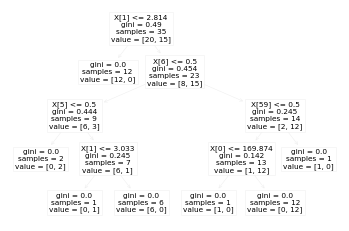

In [57]:
tree.plot_tree(dt)

What does it mean that the number of cases is the most informative feature for predicting if there were t or more deaths?

- The number of cases produces the greatest purity in the child nodes which leads to superior decision making capability of the model.

Why do you think using the 50th percentile for t was appropriate?

- The median is the 50th percentile. Since, it is a Binary Classification, I think it was appropriate to use 50th parcentile.

How many states is 10% of the data? Is that enough to get a good indication of whether or not your model is working? What if you tried a cross-validation?

- 5 states. No, I don't believe so. Small sample size will result in an increase in cross validation variance.

How well does your model perform if you remove the number of cases as a feature? What does this say about our hypothesis that the state actions can predict if a state will have had t deaths or more?

- It does way worse and score falls down drastically. In fact, it implies that state actions add less value to model than COVID-19 cases and deaths.

What do you interpret your model is learning when the number of cases are present as a feature? What do you interpret your model is learning when the number of cases is not included as a feature? What does that say about the data and the model?

- I consider that my model learns that that the number of cases is the best feature to use for the decision tree. When the number of cases is not added as a feature, my model considers the COVID-19 Cases per 1,000,000 Population feature is the best fit to initiate the decision tree. The features related to cases/deaths appear to be the most significant to my model and secures the best performance. I tried to run the model excluding cases/deaths features and my model showed the poorest result.

Based on what you understand about Logistic Regression, could you make a similar interpretation if you had used Logistic Regression instead of Decision Trees as your classifier? (Note: if you had used a MLP Neural Network, interpretation is nearly impossible)

- I think it is possible to use Logistic Regression. But, we have to manually incorporate the features into the Logistic Regression model whereas Decision trees automatically deals with the features.

What else could this data tell you?

- The data for this dataset is taken at a particular point in time. Therefore, it can be compared to the latest version or changes to observe the outcome. Cases/deaths for a particular state can be more efficiently handled by altering the actions taken if we compare the updated data with the previous one/ones. Another obvious insight regarding this data is, it is hard to claim relationship between actions taken and the cases/deaths rates and more research is required.